<a href="https://colab.research.google.com/github/awayeseullee/awayeseullee/blob/main/%EC%A0%9C%EC%A1%B0_%EA%B8%88%EC%9C%B5_%EA%B2%8C%EC%9E%84_%EB%8F%84%EB%A9%94%EC%9D%B8_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94_EDA_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🔒 [금융] Practice**
---
* **제시된 금융 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|
|isFlaggedFraud|의심사기거래|


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/[패캠] 데이터분석 강의/[패캠] 데이터분석 과제_4주차/example_2.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame 만들기

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

df.shape

(6362620, 11)

In [ ]:
# Data type 확인 → 각 Column별 Data Type 출력
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여 아래 지표 추출하기

  (1) 'isFraud' Column으로 전체 사기율(%)을 계산

  (2) 'type'에 따른 사기율(%)을 계산

  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하기
  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화)

```

### 1번 : 전체 사기율 구하기 (약 1.2%)

In [ ]:
# 'isFraud' = 1 인 Column의 비율

df['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

### 2번 : 'type'에 따른 사기율(%)

In [ ]:
# Type 종류
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

#### PAYMENT

In [ ]:
# 각 Type별 isFraud 개수 구하기
df_type1 = df[df["type"]=="PAYMENT"]

In [ ]:
df_type1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [ ]:
# PAYMENT 사기율 = 0%

df_type1[df_type1["isFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


#### TRANSFER

In [ ]:
df_type2 = df[df["type"]=="TRANSFER"]

In [ ]:
df_type2[df_type2["isFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [ ]:
# TRANSFER 사기율 = 약 0.7%


len(df_type2[df_type2["isFraud"]==1])/len(df_type2)

0.007687991758442811

#### DEBIT

In [ ]:
df_type3 = df[df["type"]=="DEBIT"]

In [ ]:
# DEBIT 사기율 = 0%

df_type3[df_type3["isFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


#### CASH_OUT

In [ ]:
df_type4 = df[df["type"]=="CASH_OUT"]

In [ ]:
df_type4[df_type4["isFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [ ]:
# CASH_OUT 사기율 = 약 0.18%

len(df_type4[df_type4["isFraud"]==1])/len(df_type4)

0.0018395530726256983

#### CASH_IN

In [ ]:
df_type5 = df[df["type"]=="CASH_IN"]

In [ ]:
# CASH_IN 사기율 = 0%

df_type5[df_type5["isFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


### 3번 : 사기거래와 사기거래가 아닌 거래의 amount의 분포 비교

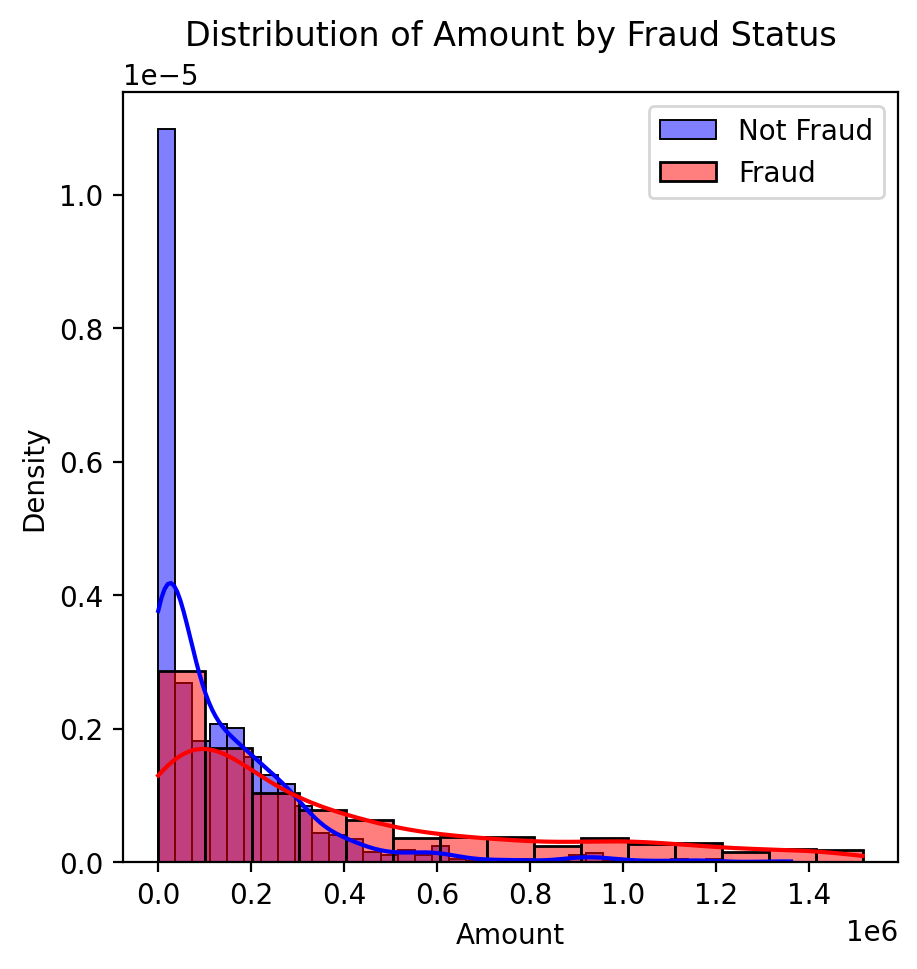

In [ ]:
# 두 집단의 Value의 분포가 차이가 있는지를 같은 그래프 안에서 비교하여 보기 위해 겹쳐서 출력

df_Y = df[(df['isFraud'] == 1) & (df['amount'] <= 1517771)]['amount'].sample(1000)
df_N = df[(df['isFraud'] == 0) & (df['amount'] <= 1517771)]['amount'].sample(1000)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(5, 5))


# 사기거래가 아닌 경우의 amount 분포를 플롯
sns.histplot(df_N, kde=True, label='Not Fraud', color='blue', stat="density")


# 사기거래인 경우의 amount 분포를 플롯
sns.histplot(df_Y, kde=True, label='Fraud', color='red', stat="density")


plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution of Amount by Fraud Status')
plt.legend()


plt.show()

#### 결론
사기거래의 경우 amount 분포가 정상 거래보다 넓게 퍼져 있는 형태가 나타나고 있음. 
amount 양이 0.3*10^6 보다 크다면 Fraud 의심해 볼 수 있음